В этом наборе данных содержится подробная информация о режиме занятий в тренажерном зале, физических характеристиках и показателях физической подготовки.Датасет был взят с сайта www.kaggle.com.
В датасете есть числове и тестовые данные.
В датасете представлены следующие атрибуты:
Age - возраст клиента тренажерного зала.
Gender - пол клиента тренажерного зала (мужской или женский).
Weight (kg) - Вес клиента клуба в килограммах.
Height (m) - Рост клиента клуба в метрах.
Max_BPM: Максимальная частота сердечных сокращений (ударов в минуту) во время тренировок.
Avg_BPM: Средняя частота сердечных сокращений во время тренировок.
Resting_BPM: Частота сердечных сокращений в состоянии покоя перед тренировкой.
Session_Duration (часы): Продолжительность каждой тренировки в часах.
Calories_Burned: Общее количество калорий, сожженных во время каждой тренировки.
Workout_Type (тип тренировки): Тип проведенной тренировки
Fat_Percentage (процент жира): Процент жира в организме участника.
Water_Intake (liters): Суточное потребление воды во время тренировок.
Workout_Frequency (days/week): Количество тренировок в неделю.
Experience_Level: Уровень опыта, от новичка (1) до эксперта (3).
BMI: индекс массы тела, рассчитанный на основе роста и веса.



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('gym.csv')
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [4]:
def findOutliers(arr, outliers):
  sorted = np.sort(arr)
  iqr = (np.ceil(75/100*len(sorted)))-(np.ceil(25/100*len(sorted)))

  threshold1 = sorted[int(np.ceil(25/100*len(sorted)))]-1.5*sorted[int(iqr)]
  threshold2 = sorted[int(np.ceil(75/100*len(sorted)))]+1.5*sorted[int(iqr)]

  i = 0
  while sorted[i] < threshold1:
    outliers.append(sorted[i])
    i += 1

  i = -1
  while threshold2 < sorted[i]:
    outliers.append(sorted[i])
    i -= 1

  return outliers

Общий вес

Среднее значение: 73.85467625899281
СКО:21.196599700720427
Пропущенные значения: 0
Выбросы: 
[]


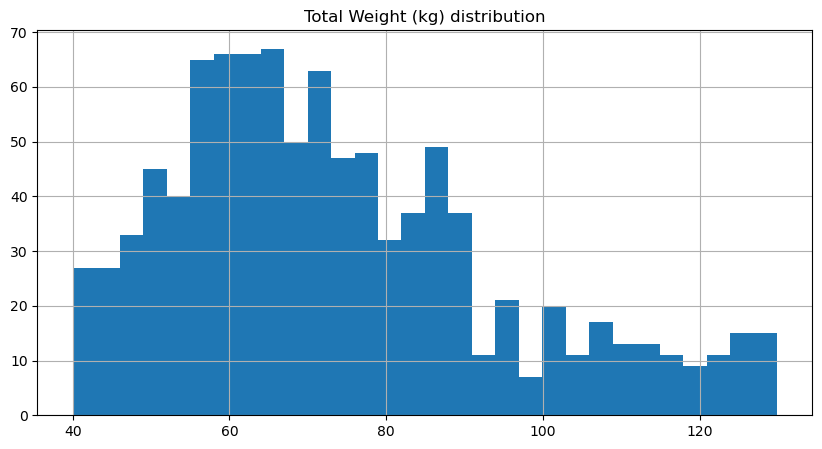

In [6]:
totalWeight = np.array(df['Weight (kg)'])
totalWeightMean = totalWeight.mean()
print('Среднее значение: ' + str(totalWeightMean))

totalWeightSKO = np.std(totalWeight)
print('СКО:' + str(totalWeightSKO))

plt.figure(figsize=(10, 5))
plt.hist(df['Weight (kg)'], bins=30);
plt.grid(True)
plt.title('Total Weight (kg) distribution')

print('Пропущенные значения: ' + str(df['Weight (kg)'].isna().sum()))

wOutliers = []

print('Выбросы: ')
print(findOutliers(totalWeight, wOutliers))

Общий возраст

Среднее значение: 38.68345323741007
СКО: 12.174666788255806
Пропущенные значения: 0
Выбросы: 
[]


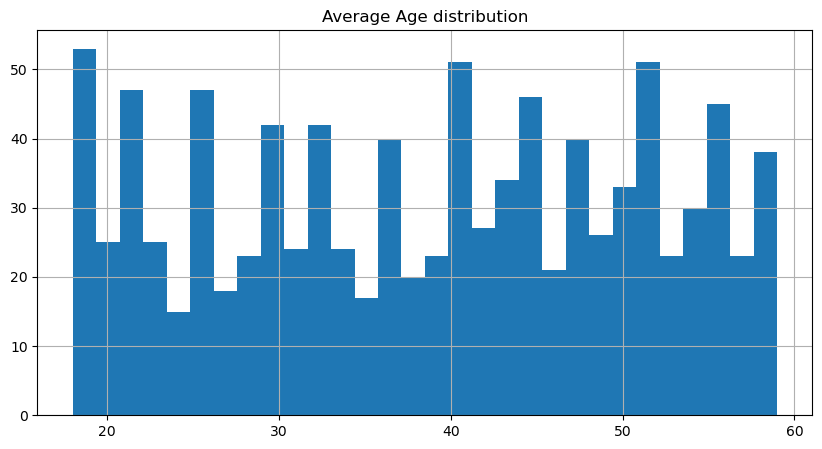

In [8]:
totalAge = np.array(df['Age'])
totalAgeMean = totalAge.mean()
print('Среднее значение: ' + str(totalAge.mean()))

totalAgeSKO = np.std(totalAge)
print('СКО: ' + str(totalAgeSKO))

plt.figure(figsize=(10, 5))
plt.hist(df['Age'], bins=30);
plt.grid(True)
plt.title('Average Age distribution')

print('Пропущенные значения: ' + str(df['Age'].isna().sum()))

ageOutliers = []

print('Выбросы: ')
print(findOutliers(totalAge, ageOutliers))

общее время

Среднее значение: 1.2564234326824255
СКО: 0.3428571588772144
Пропущенные значения: 0
Выбросы: 
[]


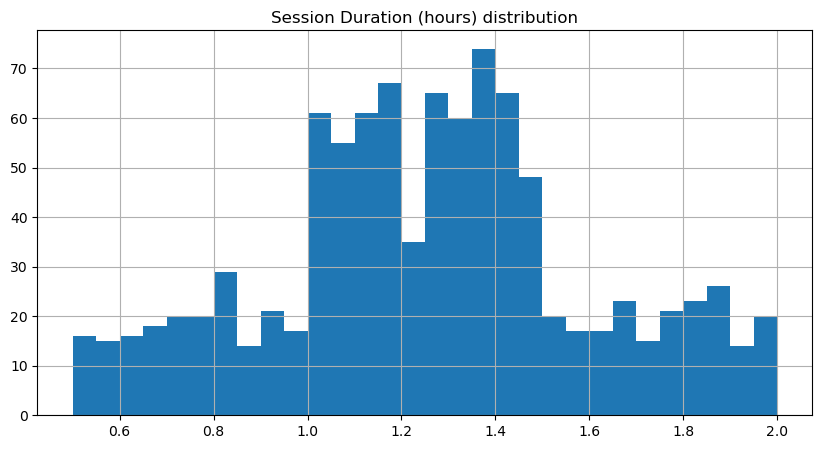

In [10]:
totalTime = np.array(df['Session_Duration (hours)'])
totalTimeMean = totalTime.mean()
print('Среднее значение: ' + str(totalTime.mean()))

totalTimeSKO = np.std(totalTime)
print('СКО: ' + str(totalTimeSKO))

plt.figure(figsize=(10, 5))
plt.hist(df['Session_Duration (hours)'], bins=30);
plt.grid(True)
plt.title('Session Duration (hours) distribution')

print('Пропущенные значения: ' + str(df['Session_Duration (hours)'].isna().sum()))

timeOutliers = []

print('Выбросы: ')
print(findOutliers(totalTime, timeOutliers))

In [11]:
опыт посетителей Experience_Level

SyntaxError: invalid syntax (4156868690.py, line 1)

In [ ]:
totalExp = np.array(df['Experience_Level'])
totalExpMean = totalExp.mean()
print('Среднее значение: ' + str(totalExp.mean()))

totalExpSKO = np.std(totalExp)
print('СКО: ' + str(totalExpSKO))

plt.figure(figsize=(10, 5))
plt.hist(df['Experience_Level'], bins=30);
plt.grid(True)
plt.title('Experience Level distribution')

print('Пропущенные значения: ' + str(df['Experience_Level'].isna().sum()))

ExpOutliers = []

print('Выбросы: ')
print(findOutliers(totalExp, ExpOutliers))


Количество соженных каллории Calories_Burned

In [ ]:
totalCal = np.array(df['Calories_Burned'])
totalCalMean = totalCal.mean()
print('Среднее значение: ' + str(totalCal.mean()))

totalCalSKO = np.std(totalCal)
print('СКО: ' + str(totalCalSKO))

plt.figure(figsize=(10, 5))
plt.hist(df['Calories_Burned'], bins=30);
plt.grid(True)
plt.title('Calories Burned distribution')

print('Пропущенные значения: ' + str(df['Calories_Burned'].isna().sum()))

CalOutliers = []

print('Выбросы: ')
print(findOutliers(totalCal, CalOutliers))

Общий рост Height (m)  

In [ ]:
totalHeight = np.array(df['Height (m)'])
totalHeightMean = totalHeight.mean()
print('Среднее значение: ' + str(totalHeight.mean()))

totalHeightSKO = np.std(totalHeight)
print('СКО: ' + str(totalHeightSKO))

plt.figure(figsize=(10, 5))
plt.hist(df['Height (m)'], bins=30);
plt.grid(True)
plt.title('Height (m) distribution')

print('Пропущенные значения: ' + str(df['Height (m)'].isna().sum()))

hOutliers = []

print('Выбросы: ')
print(findOutliers(totalHeight, hOutliers))

Зависимость веса от роста

In [ ]:
сoef1 = np.corrcoef(totalWeight, totalHeight)
print('Матрица корелляции: ')
print(сoef1)

plt.figure(figsize=(10, 5));
plt.scatter(df['Weight (kg)'], df['Height (m)']);
plt.xlabel('Weight (kg)');
plt.ylabel('Height (m)');
plt.title('Dependence of Weight (kg) on Height (m)');

Зависимость веса от возраста

In [ ]:
сoef2 = np.corrcoef(totalWeight, totalAge)
print('Матрица корелляции: ')
print(сoef2)

plt.figure(figsize=(10, 5));
plt.scatter(df['Weight (kg)'], df['Age']);
plt.xlabel('Weight (kg)');
plt.ylabel('Age');
plt.title('Dependence of Weight (kg) on Age');

Зависимость опыта посетителей от возраста

In [ ]:
сoef3 = np.corrcoef(totalExp, totalAge)
print('Матрица корелляции: ')
print(сoef3)

plt.figure(figsize=(10, 5));
plt.scatter(df['Experience_Level'], df['Age']);
plt.xlabel('Experience Level');
plt.ylabel('Age');
plt.title('Dependence of Experience Level on Age');

Зависимость времени от соженных каллории

In [ ]:
сoef4 = np.corrcoef(totalTime, totalCal)
print('Матрица корелляции: ')
print(сoef4)

plt.figure(figsize=(10, 5));
plt.scatter(df['Session_Duration (hours)'], df['Calories_Burned']);
plt.xlabel('Session Duration');
plt.ylabel('Calories Burned');
plt.title('Dependence of Session Duration on Calories Burned');

Зависимость времени от возроста

In [ ]:
сoef5 = np.corrcoef(totalTime, totalAge)
print('Матрица корелляции: ')
print(сoef5)

plt.figure(figsize=(10, 5));
plt.scatter(df['Session_Duration (hours)'], df['Age']);
plt.xlabel('Session Duration');
plt.ylabel('Age');
plt.title('Dependence of Session Duration on Age');